In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
num_points = 200

X = np.linspace(0, 100, num_points)
y = -5 + 2.7 * X

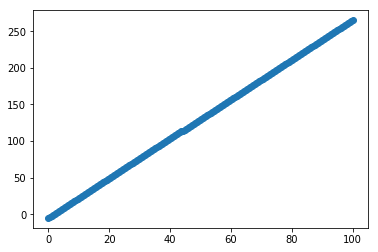

In [3]:
plt.scatter(X, y)
plt.show()

#### But in real life, this kind of ideal linear dependencies don't exist for verious reasons. You're much more likely to see something like this

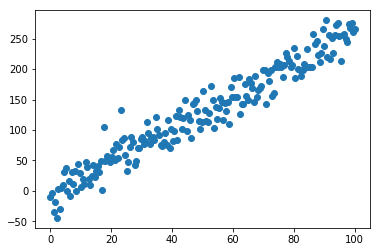

In [4]:
std = 20

y = y + np.random.normal(0, std, num_points)

plt.scatter(X, y)
plt.show()

### One can mentaly draw a line trough all this points. Having a line describing all this points would be useful, because you can then predict ***y***, given ***X***. 
Let's see an easy example form real life

#### This is a simple example which illustrates a linearly dependent data. Data consists of 4 columns, where first 3 represent the amount of money spent on ***TV, radio and newspaper*** advertisment respectively, and 4th column represents the total monthly sales.  ***y*** in this example is ***sales*** column, and ***X*** matrix is the ***TV, Radio and Newspaper*** columns combined. Let's first load the data and plot sales vs TV advertising spending.

In [89]:
# Let's first load the data
df = pd.read_csv("./Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


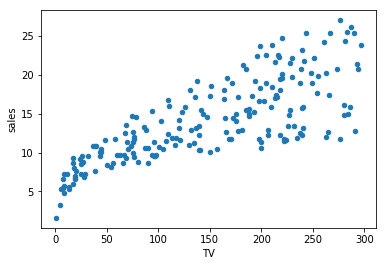

In [90]:
df.plot.scatter(x = "TV", y = "sales")

Clearly TV advertisement increases the sales. Now let's fit a line trough it. 
We cant to split the data we have into training and test datasets to later assess how good we learned the line by testing it on data the model hasn't seen before. sikit learn das a good funciton for that.

In [91]:
x = np.array(df[["TV", "radio", "newspaper"]])
y = np.array(df.sales)

print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(200, 3) (200,)
(134, 3) (134,)
(66, 3) (66,)


Then we create a sikit learn object for linear regression, that will do all the work for us.

In [92]:
# Create linear regression object
lin_reg = linear_model.LinearRegression()

In [93]:
# Train the model using the training sets
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
# Make predictions using the testing set
y_pred = lin_reg.predict(x_test)

In [95]:
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients: 
 [0.04466512 0.19663006 0.00607439]
Mean squared error: 3.73


In [96]:
lin_reg.intercept_

2.7580716192171053

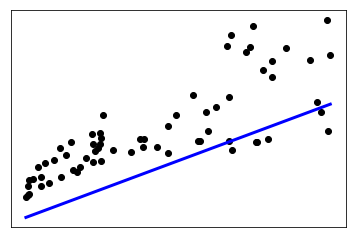

In [85]:
# Plot outputs
plt.scatter(x_test[:,0], y_test,  color='black')

x = np.linspace(min(x_test[:,0]), max(x_test[:,0]), 100)
plt.plot(x, lin_reg.intercept_ + lin_reg.coef_[0]*x, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()